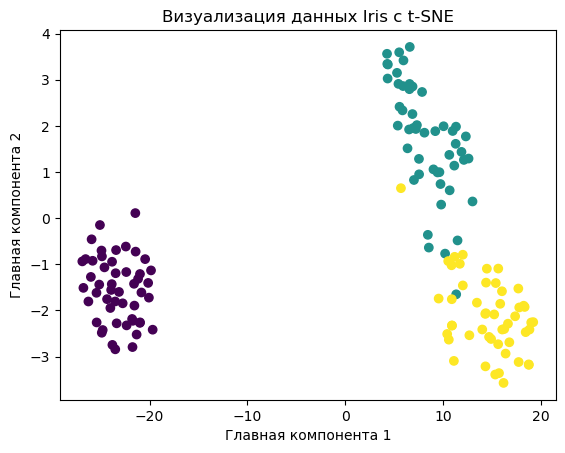

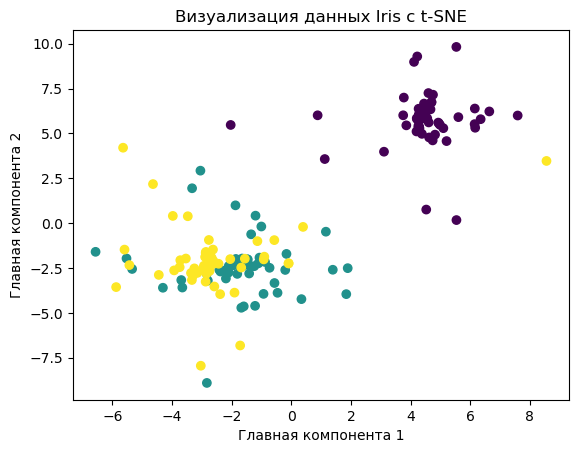

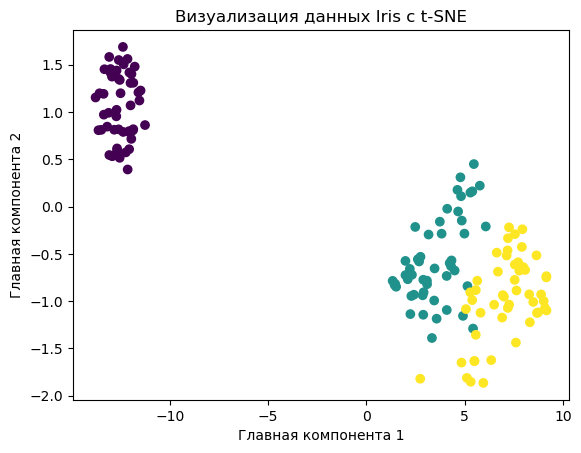

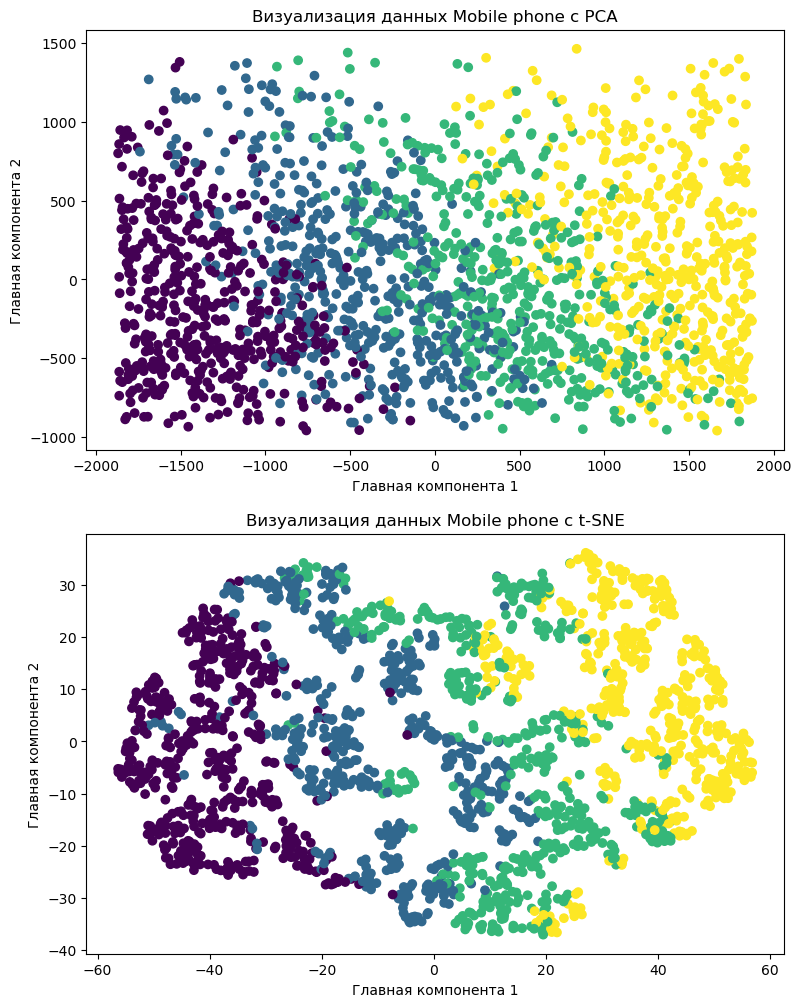

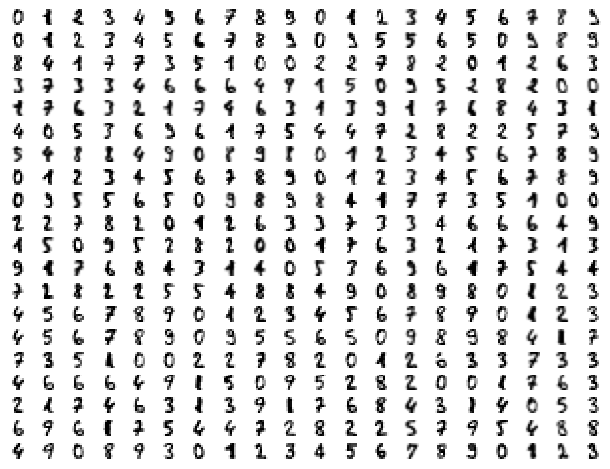

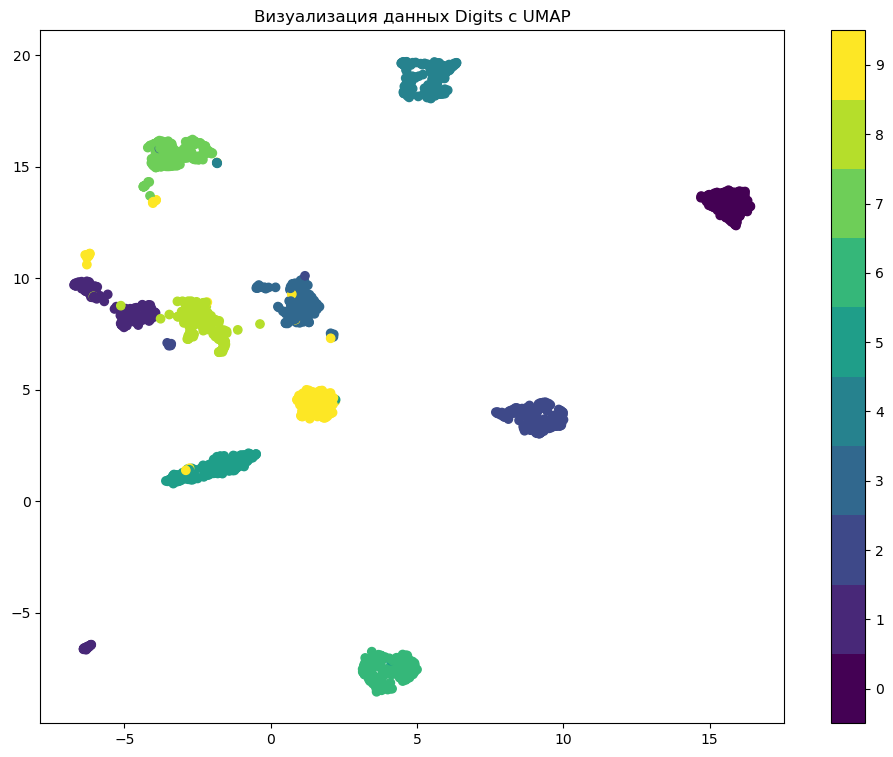

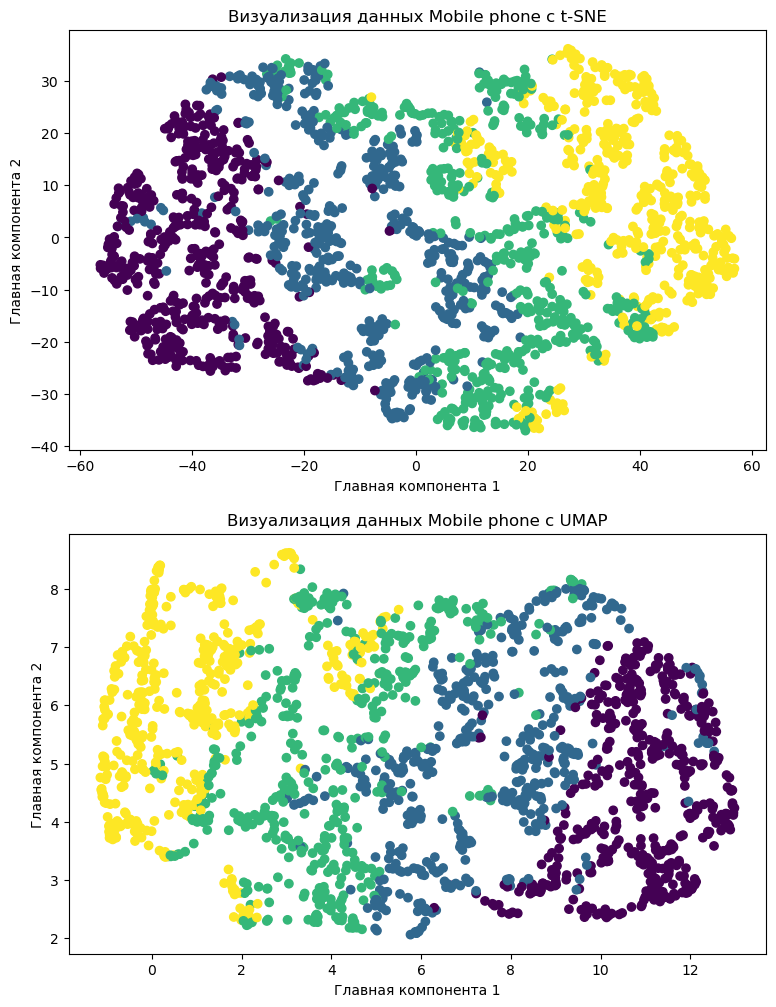

In [102]:
from sklearn.datasets import load_iris, load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import umap
import numpy as np
iris=load_iris()
X=iris.data
y=iris.target

#1,2
def tsne(X,y,n_c, n_i, l_r, per):
    tsne=TSNE(n_components=n_c, n_iter=n_i, learning_rate=l_r, perplexity=per)
    X_tsne=tsne.fit_transform(X)
    #fig, axes=plt.subplots(1,1,figsize=(9,12))
    plt.scatter(X_tsne[:,0], X_tsne[:,1],c=y)
    plt.title("Визуализация данных Iris с t-SNE")
    plt.xlabel("Главная компонента 1")
    plt.ylabel("Главная компонента 2")
    plt.show()
iris

tsne(X,y,2,1000,"auto", 30)
tsne(X,y,2,250,100, 30)
tsne(X,y,2,1000,"auto", 50)

#3
mobile_df=pd.read_csv("D:/IDA/mobile_praces/train.csv")
X=mobile_df.drop("price_range", axis=1)
y=mobile_df["price_range"]
pca = PCA(n_components=2)
tsne=TSNE(n_components=2)
fig, axes=plt.subplots(2,1,figsize=(9,12))
X_pca=pca.fit_transform(X)
X_tsne=tsne.fit_transform(X)
axes[0].scatter(X_pca[:,0], X_pca[:,1],c=y)
axes[0].set_title("Визуализация данных Mobile phone с PCA")
axes[0].set_xlabel("Главная компонента 1")
axes[0].set_ylabel("Главная компонента 2")
axes[1].scatter(X_tsne[:,0], X_tsne[:,1],c=y)
axes[1].set_title("Визуализация данных Mobile phone с t-SNE")
axes[1].set_xlabel("Главная компонента 1")
axes[1].set_ylabel("Главная компонента 2")

#4
digits=load_digits()
digits
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)
plt.show()
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(digits.data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
plt.figure(figsize=(12,9))
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Визуализация данных Digits с UMAP');
plt.show()

#5
tsne=TSNE(n_components=2)
reducer = umap.UMAP(n_components=2)
X_tsne=tsne.fit_transform(X)
X_umap=reducer.fit_transform(X)
fig, axes=plt.subplots(2,1,figsize=(9,12))
axes[0].scatter(X_tsne[:,0], X_tsne[:,1],c=y)
axes[0].set_title("Визуализация данных Mobile phone с t-SNE")
axes[0].set_xlabel("Главная компонента 1")
axes[0].set_ylabel("Главная компонента 2")
axes[1].scatter(X_umap[:,0], X_umap[:,1],c=y)
axes[1].set_title("Визуализация данных Mobile phone с UMAP")
axes[1].set_xlabel("Главная компонента 1")
axes[1].set_ylabel("Главная компонента 2")
plt.show()